In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [4]:
# Load the dataset
df = pd.read_csv("StudentPerformanceFactors_Cleaned.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:

# Data Cleaning and Preprocessing
# Handling missing values
df.fillna(df.mode().iloc[0], inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting Features and Target
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']


In [6]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


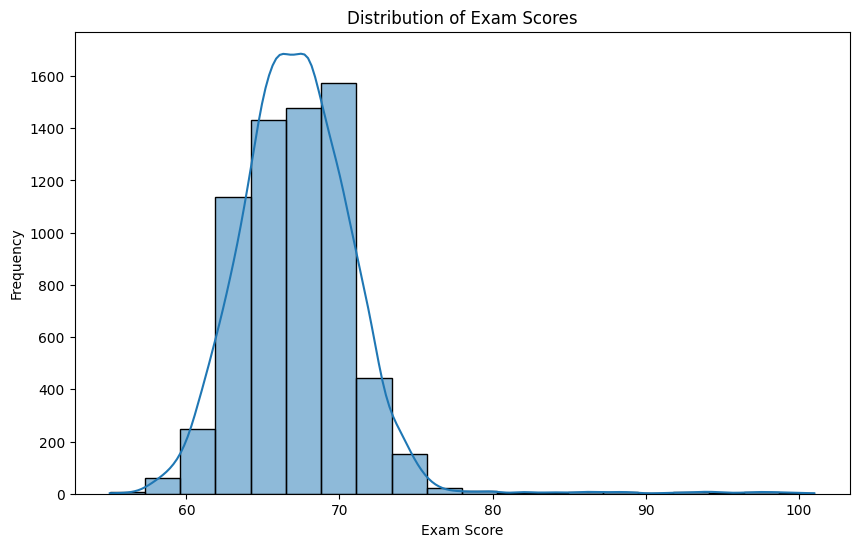

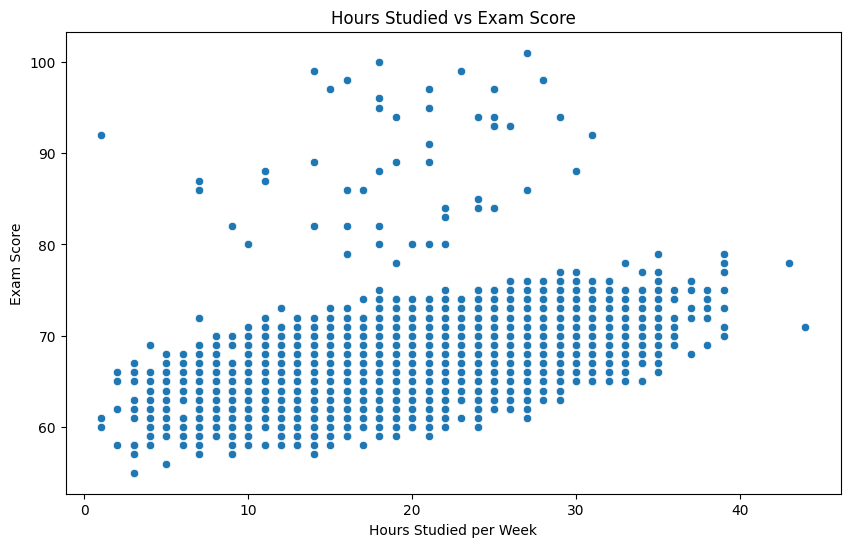

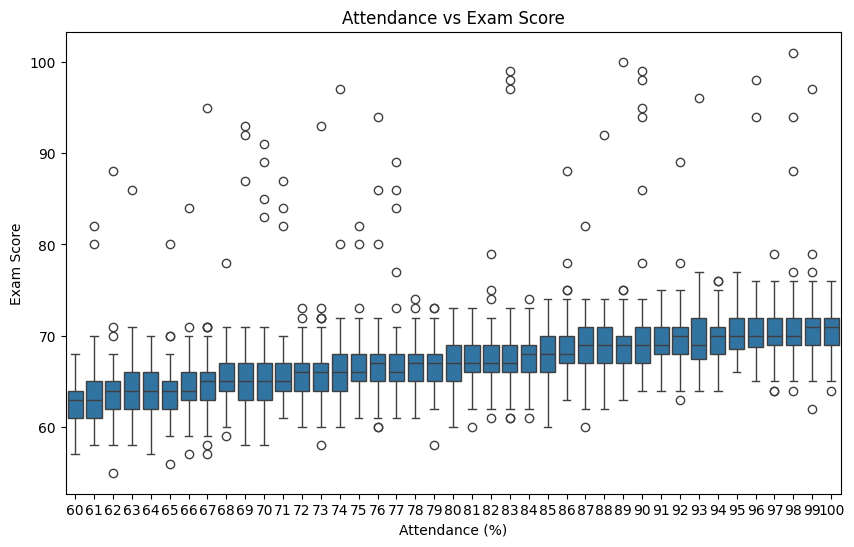

In [7]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Hours_Studied'], y=df['Exam_Score'])
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied per Week")
plt.ylabel("Exam Score")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Attendance'], y=df['Exam_Score'])
plt.title("Attendance vs Exam Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Exam Score")
plt.show()

In [8]:
# Model Training - Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)



LinearRegression()

In [9]:
# Model Evaluation - Linear Regression
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [10]:
# Prediction Function
def predict_student_performance(input_data):
    input_df = pd.DataFrame([input_data])
     # Note: 'Hours_Studied' represents study hours per week
    for col, le in label_encoders.items():
        if col in input_df.columns:
            input_df[col] = le.transform(input_df[col])
    input_scaled = scaler.transform(input_df)
    predicted_score = linear_model.predict(input_scaled)
    return predicted_score[0]


In [11]:
# Example Usage
example_student = {
    'Hours_Studied': 25, 'Attendance': 90, 'Parental_Involvement': 'High',
    'Access_to_Resources': 'High', 'Extracurricular_Activities': 'Yes',
    'Sleep_Hours': 7, 'Previous_Scores': 80, 'Motivation_Level': 'High',
    'Internet_Access': 'Yes', 'Tutoring_Sessions': 2, 'Family_Income': 'Medium',
    'Teacher_Quality': 'High', 'School_Type': 'Public', 'Peer_Influence': 'Positive',
    'Physical_Activity': 4, 'Learning_Disabilities': 'No', 'Parental_Education_Level': 'College',
    'Distance_from_Home': 'Near', 'Gender': 'Male'
}


In [12]:
predicted_score = predict_student_performance(example_student)
print("Predicted Exam Score:", (round(predicted_score,2)))

Predicted Exam Score: 73.64


In [13]:

import joblib

# Save the models
joblib.dump(linear_model, 'linear_regression_model.pkl')


# Save encoders and scaler
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']